# **Exploratory Data Analysis - Play Store App Review Analysis**



In [63]:
# getting necessary libraries
import numpy as np
import pandas as pd

In [64]:
# getting data
playdf=pd.read_csv('/content/Play Store Data (1).csv')
reviewdf=pd.read_csv('/content/User Reviews (1).csv')


In [65]:
playdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [66]:
reviewdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


 **Data Cleaning**

In [67]:
# checking shape of the dataframe
print(f"Playdf shape: {playdf.shape}")
print(f"Reviewdf shape: {reviewdf.shape}")

Playdf shape: (10841, 13)
Reviewdf shape: (64295, 5)


In [68]:
# checking columns and dtype and null values
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [69]:
# checking for null values in columns
reviewdf.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

  **here we can see that there are 6210 null values in Translated_Review, Sentiment,Sentiment_Polarity,Sentiment_Subjectivity so here we have to drop that null rows**



In [70]:
# dropping null values
reviewdf.dropna(inplace=True)

In [71]:
reviewdf.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [72]:
reviewdf.shape

(37427, 5)

In [73]:
reviewdf.reset_index(inplace=True)
reviewdf.head()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [74]:
# checking for column name , dtype and Null counts
playdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [75]:
playdf.isnull().sum()
# here we can see that there are nan values in Rating, Current ver , android ver ,type, Content Rating column in play df

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [76]:
playdf['Rating'].interpolate(inplace=True)

In [77]:
playdf.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [78]:
playdf.dropna(inplace=True)

In [79]:
playdf.reset_index(inplace=True)
playdf.isnull().sum()

index             0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## **Check for duplicate values in df**

In [80]:
playdf.head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [81]:
# checking for duplicate rows using subset
playdf.duplicated(subset=['App','Category','Type','Price','Genres','Rating','Last Updated']).sum()

1051

here we see that there are 1051 duplicate rows ,
So we have to remove that duplicate rows

In [82]:
# dropping duplicate rows
playdf1=playdf.drop_duplicates(subset=['App','Category','Type','Price','Genres','Rating','Last Updated'])

In [83]:
playdf1.duplicated(subset=['App','Category','Type','Price','Genres','Rating','Last Updated']).sum()

0

here we can see that all the duplicate values are dropped

In [84]:
# lets check in reviewdf also
reviewdf.duplicated().sum()

0

In [85]:
# here we can see that there is no duplicate values in dataframe

## **Now we can check for outliers in numeric columns**

In [86]:
playdf1.describe([0.05,0.1,0.25,0.5,0.75,0.90,0.95])

,index,Rating
count,9778.000000,9778.000000
mean,5658.483534,4.176912
std,3097.869800,0.533857
min,0.000000,1.000000
5%,586.700000,3.100000
10%,1199.700000,3.500000
25%,3108.250000,4.000000
50%,5790.500000,4.300000
75%,8317.750000,4.500000
90%,9833.300000,4.700000


here we can see that mostly crowd in rating column lies between 3.6 to 4.8. So For checking outliers we know that app rating is between 1 to 5 so we can conclude that there is no outlier beacuse min is 1 and max is 5


In [87]:
# Lets plot boxplot also
from matplotlib import pyplot as plt
import seaborn as sns

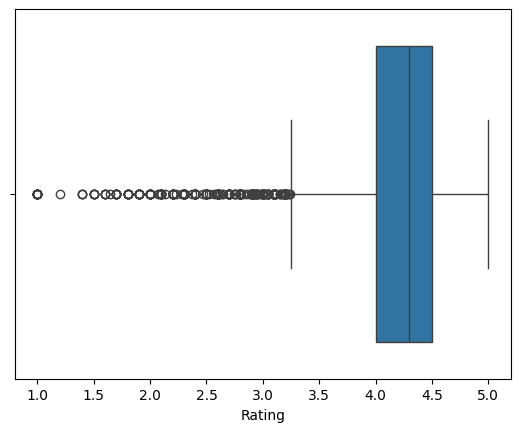

In [88]:
sns.boxplot(x=playdf1['Rating'])
plt.show()

here boxplot show outliers between 1 to 3.25 because max crowd is between 3.25 to 5 but we know that app rating is between 1 to 5 so there is no outlier

In [89]:
reviewdf.describe([0.05,0.1,0.25,0.5,0.75,0.90,0.95])

,index,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000,37427.000000
mean,31764.760654,0.182171,0.492770
std,19000.583342,0.351318,0.259904
min,0.000000,-1.000000,0.000000
5%,2938.300000,-0.400000,0.000000
10%,5925.800000,-0.200000,0.000000
25%,14559.500000,0.000000,0.357143
50%,31685.000000,0.150000,0.514286
75%,48397.500000,0.400000,0.650000
90%,58118.400000,0.650000,0.800000


here we can see that there is no outlier in reviewdf also


**# lets make the installations column to numeric by removing '+' symbol from the last**

In [90]:
playdf1.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [91]:
# function designed that will remove '+' from last and then split it by ',' then join
def strtonumeric(n):
  return ''.join(n[:len(n)-1].split(','))


In [92]:
# converting installations column to numeric by removing '+' and ','
playdf1['Instalations']=playdf1['Installs'].apply(strtonumeric)

<ipython-input-92-118fa1cbaa71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playdf1['Instalations']=playdf1['Installs'].apply(strtonumeric)


In [93]:
# cange data type to int64
playdf1['Instalations']=playdf1['Instalations'].astype('int64')

<ipython-input-93-1ce4907e7fff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playdf1['Instalations']=playdf1['Instalations'].astype('int64')


In [94]:
playdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9778 entries, 0 to 10828
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9778 non-null   int64  
 1   App             9778 non-null   object 
 2   Category        9778 non-null   object 
 3   Rating          9778 non-null   float64
 4   Reviews         9778 non-null   object 
 5   Size            9778 non-null   object 
 6   Installs        9778 non-null   object 
 7   Type            9778 non-null   object 
 8   Price           9778 non-null   object 
 9   Content Rating  9778 non-null   object 
 10  Genres          9778 non-null   object 
 11  Last Updated    9778 non-null   object 
 12  Current Ver     9778 non-null   object 
 13  Android Ver     9778 non-null   object 
 14  Instalations    9778 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.4+ MB


here we can see that installations column is converted to int64

## **Data Visualization**

In [95]:
playdf1.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Instalations
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


<Axes: xlabel='Rating', ylabel='Count'>

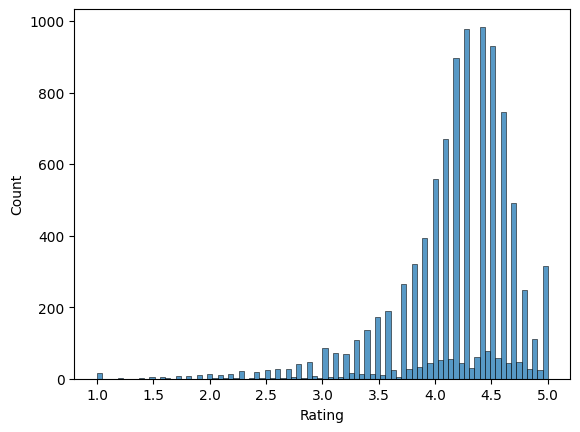

In [96]:
# lets check rating distribution using histogram
sns.histplot(x='Rating',data=playdf1)

## **Top 5 apps category by Installation**

In [97]:
# checking unique values in category
playdf1['Category'].nunique()

33

In [98]:
category=playdf1.groupby(['Category'])
top5=category['Instalations'].agg('sum').sort_values(ascending=False)[:5]

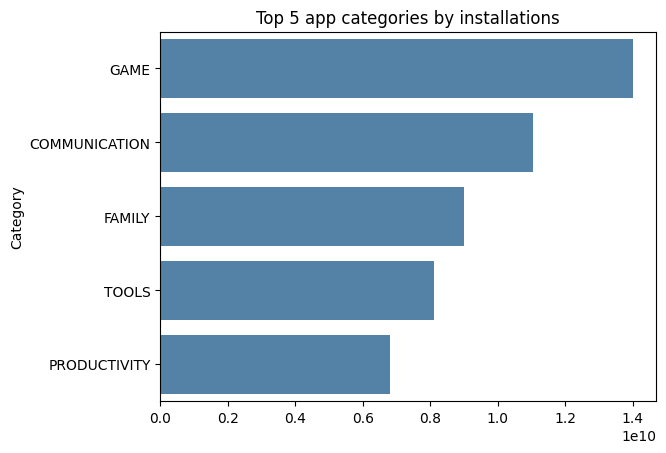

In [99]:
ax=sns.barplot(x=top5.values, y=top5.index,color='steelblue', orient='h').set(title="Top 5 app categories by installations")


### **Here we can see that maximum number of installations by category is GAME **

In [100]:
# top 5 category by rating
top5Category=category['Rating'].agg('mean').sort_values(ascending=False)[:5]

In [101]:
top5Category

Category
EVENTS             4.411477
ART_AND_DESIGN     4.376190
EDUCATION          4.366387
PARENTING          4.304167
PERSONALIZATION    4.303668
Name: Rating, dtype: float64

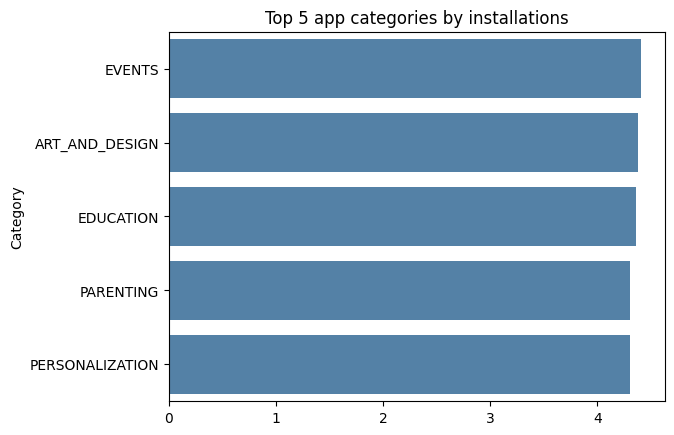

In [102]:
ax=sns.barplot(x=top5Category.values, y=top5Category.index,color='steelblue', orient='h').set(title="Top 5 app categories by installations")


### **here we conclude that EVENTS and EDUCATION have better average ratings**

In [103]:
playdf1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### **Is Free app installations is grater than paid apps ?**

In [104]:
print(f"Is Free app installations is grater than paid apps : {len(playdf1[playdf1['Price']=='0'])>len(playdf1[playdf1['Price']!='0'])}")

Is Free app installations is grater than paid apps : True


In [105]:
playdf1.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Instalations
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [106]:
reviewdf.head()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.00,0.300000


### **Top 5 highest reviewed apps**




In [107]:
playdf1['Reviews']=playdf1['Reviews'].astype('int64')

<ipython-input-107-3e25f330c11a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playdf1['Reviews']=playdf1['Reviews'].astype('int64')


In [108]:
top5app=playdf1.sort_values(by='Reviews',ascending=False).iloc[:5,][['App','Reviews']]

<ipython-input-109-2dd7a79c4014>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews',y='App',data=top5app,orient='h',palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green','tab:purple']).set(title="Top by Reviewed apps")


[Text(0.5, 1.0, 'Top by Reviewed apps')]

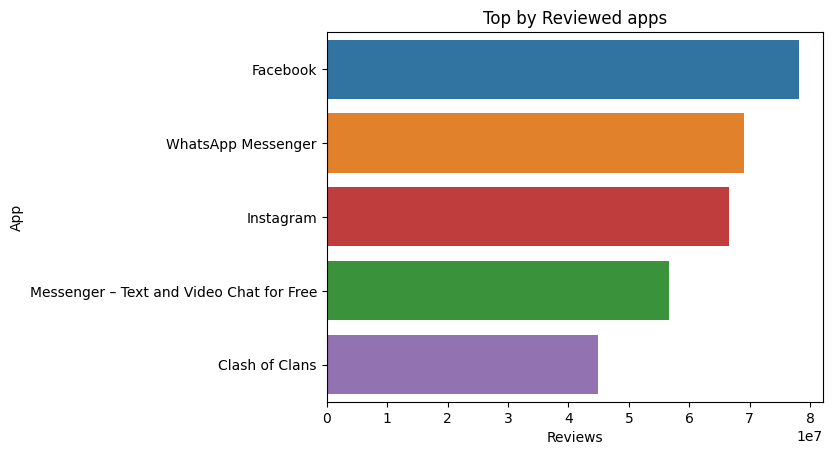

In [109]:
sns.barplot(x='Reviews',y='App',data=top5app,orient='h',palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green','tab:purple']).set(title="Top by Reviewed apps")


In [110]:
reviewdf.head()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.00,0.300000


<Axes: xlabel='Sentiment_Polarity', ylabel='Count'>

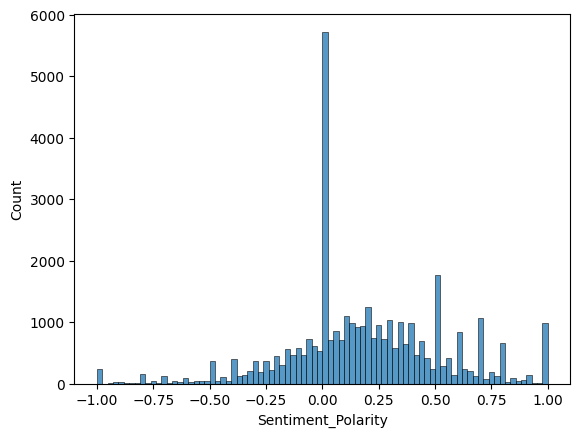

In [111]:
# lets plot a histogram to see the distribution of Sentiment_Polarity
sns.histplot(data=reviewdf,x='Sentiment_Polarity')

we can see that neutral review is high
and positive reviews are greater than negative reviews

In [112]:
# function will exrtract year from the date
def getyear(d):
  return int(d[len(d)-4:])

In [113]:
# getting year from the date
playdf1['Year']=playdf1['Last Updated'].apply(getyear)

<ipython-input-113-cad86ff9b83c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playdf1['Year']=playdf1['Last Updated'].apply(getyear)


In [114]:
# checking uniques
playdf1['Year'].unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010])

In [115]:
# now we can plot review counts over time using line plot

[Text(0.5, 1.0, 'Review count over time')]

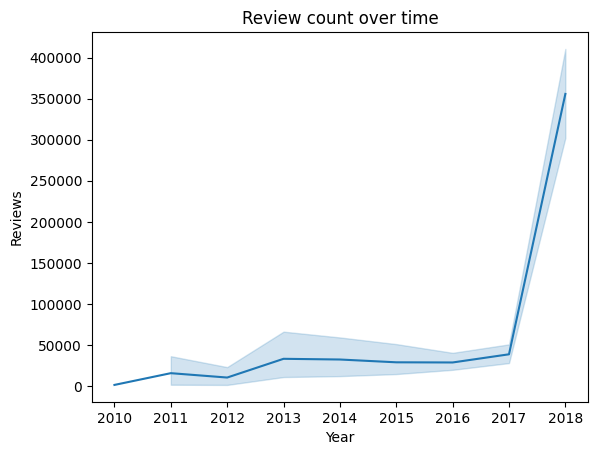

In [116]:
sns.lineplot(data=playdf1,x='Year',y='Reviews').set(title='Review count over time')

### **From the line plot we can see hat review counts increase gradually in the year 2017**

In [117]:
#count of apps by content rating
# top 5 category by rating
playdf1.groupby(['Content Rating'])['Content Rating'].agg('count').sort_values(ascending=False)

Content Rating
Everyone           7978
Teen               1063
Mature 17+          397
Everyone 10+        335
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [118]:
# this shows counts of apps avilable for different age groups

# ***EDA Conclusions***

# 1. Top 5 App Category by average Rating

1. EVENTS                 - 4.411477

2. ART_AND_DESIGN         - 4.376190

3. EDUCATION              - 4.366387

4. PARENTING              - 4.304167

5. PERSONALIZATION        - 4.303668



# 2. Free Apps have more Installations than paid apps

# 3. From the line plot we can see that review counts increase gradually in the year 2017

# 4. From the Distribution of app ratings we see that mostly rating lie between 3.75 to 4.75

# 5. From the Sentiment Polarity distribution we conclude that most person rated nuteral and positive ratings > negative ratings

# 6. Top 5 reviewed apps are ✈
1. Facebook
2. WhatsApp Messenger
3. Instagram
4. Messenger – Text and Video Chat for Free
5. Clash of Clans

# 7. Top 5 app categories by installtions ✈
1. GAME            
2. COMMUNICATION    
3. FAMILY           
4. TOOLS            
5. PRODUCTIVITY     

Top 5 App Categories by Average Rating: Providing stakeholders with information about the top-rated app categories can help them understand which types of apps are resonating most positively with users. This insight can inform decisions about future app development or investment priorities.

Free Apps vs. Paid Apps Installations: Highlighting the fact that free apps tend to have more installations than paid apps can inform pricing strategies and revenue generation models for app developers and stakeholders. It underscores the importance of considering user behavior and preferences when monetizing apps.

Review Count Trends Over Time: Observing a gradual increase in review counts during the year 2017 indicates potential trends in user engagement or app popularity. Understanding such patterns can help stakeholders identify periods of increased user activity and optimize marketing or product release schedules accordingly.

Distribution of App Ratings: Analyzing the distribution of app ratings provides stakeholders with insights into overall user satisfaction levels. Identifying the range within which most ratings fall helps gauge the general sentiment towards apps and may prompt further investigation into factors influencing user perception.

Sentiment Polarity Distribution: Understanding the sentiment polarity distribution of user reviews provides valuable insights into user feedback. Recognizing that neutral and positive ratings outnumber negative ratings suggests overall satisfaction with the apps analyzed. Stakeholders can use this information to prioritize areas for improvement and capitalize on strengths.

Top 5 Reviewed Apps: Identifying the most-reviewed apps gives stakeholders a sense of which apps are generating the most user engagement and feedback. This information can guide marketing strategies, feature enhancements, or competitor analysis efforts.

Top 5 App Categories by Installations: Knowing which app categories have the highest installations informs stakeholders about popular app genres and user preferences. This insight can guide investment decisions, strategic partnerships, and resource allocation for app development and marketing initiatives.